In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# creating the Data Frame
df = yf.download('^GSPC', start='1990-08-24', end='2011-08-24');

In [ ]:
# Creating the empirical return distribution
returns = (df.Open - df.Open.shift(252))/df.Open.shift(252)
distribution = returns.dropna()
print(distribution.mean(),distribution.std())

C:\Users\TFRANCE\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


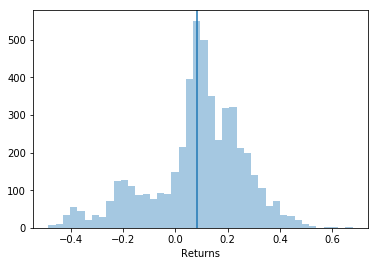

In [5]:
# Visualizing the empirical distribution
sorted_dist = pd.DataFrame(distribution.sort_values(ascending=True))
ax = sns.distplot(sorted_dist.Open, kde = False, axlabel = 'Returns', bins = 42)
plt.axvline(0.082, 0,4.0)

In [6]:
# Defining the products
def product(prod_number,distribution): 
    extraction = random.choice(distribution)
    
    if prod_number == 1: #product 103.6 
        product_return = 0.036
        
    elif prod_number == 2: #product 100
        if extraction < 0.0:
            product_return = 0.0
        else:
            product_return = 0.4*extraction
    
    elif prod_number == 3: #product 90
        if extraction < -13.70:
            product_return = -10.0
        else:
            product_return = 0.73*extraction
            
            
    elif prod_number == 4: #product 80
        if extraction < -22.00:
            product_return = -20.0
        else:
            product_return = 0.91*extraction
            
    elif prod_number == 5: #product 0
        product_return = extraction
    
    else:
        print("Please select a product number between 1 and 5")
    
    return extraction,product_return

In [7]:
# Computing empirical mean of products
mean = np.zeros(5)
N = 100000

for i in range(5):
    mean[i] = np.mean([product(i+1, distribution)[1] for l in range(N)])
    
sample_avgs = np.around(np.dot(100,mean), decimals=2) 

In [8]:
# Defining the witching rule 
def new_choice_utility_myop(means, a = .1):
    results = np.dot(100,np.array([product(i+1,distribution)[1] for i in range(5)]))
    sd = np.abs(results - means)
    utilities = means - np.dot(a * .5,sd**2)
    max_utility = np.argmax(utilities)
    return max_utility

In [ ]:
# Now we will simulate the experiment, assuming a sample of N = 100000 subjects
N = 100000
percentages = np.array([0.067, 0.21, 0.419, 0.267, 0.038])
holders = np.dot(N,percentages)

In [13]:
# Determining the new choices with utilities
new_choices = np.empty((5,5))
for i in range(5):
    a = [new_choice_utility_myop(sample_avgs) for l in range(int(holders[i]))]
    for j in range(5):
        new_choices[i,j] = sum([nc == j for nc in a])
print(new_choices)

[[  129.  1016.  1048.  1877.  2630.]
 [  424.  3187.  3263.  6071.  8055.]
 [  836.  6364.  6547. 11785. 16368.]
 [  549.  4062.  3999.  7666. 10424.]
 [  104.   584.   551.  1097.  1464.]]


In [19]:
# Control session
percentages_c = np.array([0.02, 0.152, 0.154, 0.285, 0.389])
holders_c = np.dot(N,percentages_c)
new_choices_c = np.empty((5,5))
for i in range(5):
    a = [new_choice_utility_myop(sample_avgs) for l in range(int(holders_c[i]))]
    for j in range(5):
        new_choices_c[i,j] = sum([nc == j for nc in a])
print(new_choices_c)

[[   35.   311.   279.   548.   827.]
 [  307.  2282.  2324.  4334.  5953.]
 [  338.  2293.  2351.  4559.  5859.]
 [  553.  4310.  4320.  8187. 11129.]
 [  823.  5898.  5914. 11052. 15213.]]
